In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#make variables for the arrays created in random gen for lat and longitude
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
#zip object packs each pair of lats and lngs that have the same index in their
    #respective array into a tuple, and stores the zip object in memory when called
lat_lngs = zip(lats,lngs)
lat_lngs
#each latitude and longitude in a 

In [3]:
#unpack lat_lngs into a list so we only need to create a set of random lats and longs once
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

#can only unzip a zipped tuble once before its removed from the computers mem
#make sure to unzip to a list before moving on -- so youre only working with the one random list not gen new

In [4]:
## using citipy https://github.com/wingchen/citipy
from citipy import citipy
#create a list for holding the cities
cities =[]
#Identify the nearest city for each coord combo
for coordinate in coordinates:
    #use citipy.nearest_city() with coordinates inside to ident the city and attach name with .city_name
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city name is unique add it to the list using the not in logical operator
    if city not in cities:
        cities.append(city)
#print the city count to make sure its a sufficient amt
len(cities)

616

In [5]:
#using API data
#use JSON to look throught the data from APIs
#data inside a JSON obj opens & closes with {} like a dictionary, inside the JSON obj is a collection of dictionaries and arrays
#to request JDON data over the internet use the Requests Library in Python
import requests
from config import weather_api_key


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 54.72,
  'feels_like': 51.96,
  'temp_min': 51.75,
  'temp_max': 58.14,
  'pressure': 1016,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 300},
 'clouds': {'all': 0},
 'dt': 1649692375,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1649671777,
  'sunset': 1649719229},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
#find something unique to use for organizing - like the country code which is id in sys
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 54.72,
  'feels_like': 51.96,
  'temp_min': 51.75,
  'temp_max': 58.14,
  'pressure': 1016,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 300},
 'clouds': {'all': 0},
 'dt': 1649692375,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1649671777,
  'sunset': 1649719229},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
#use the sys key from the data to get the corresponding value
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1649671777,
 'sunset': 1649719229}

In [10]:
#use the sys and country keys to get the country as an output
boston_data['sys']['country']

'US'

In [11]:
#get the date from the weather data
boston_data['dt']

1649692375

In [12]:
# use same syntax to get other major data points of interest
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 58.14 44 0 11.5


In [13]:
#date was given in date-time format so need to convert
import time
from datetime import datetime
#get the ddate from the JSON file
date= boston_data['dt']
#convert the UTC date to a date with format YYYY:MM:DD:HH:MM:SS
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 11, 15, 52, 55)

In [24]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of logging
print("Beginning Data Retrieval          ")
print("----------------------------------")

#create counters (want to run in groups of 50 and have counters to iterate through to gather info?)
#doing in groups of 50, then forcing pause bc our subscription to API only allows 60 calls per min
    #prevents time outs
record_count = 1
set_count = 1

#loop through all the cities in list
# for i in range(len(cities)):
    #fix for loop to add city names not index
for i, city in enumerate(cities):
    #using enumerate allost to iterate through the list of cities and retrieve both the index and city from list
    
    #group cities in sets of 50 for logging purposes-- prevents time outs
    if (i % 50 == 0 and i >=50):
        #checks if the remainder of index / 50 is = 0 and if >= 50
            #if true then increment set & record count by 1
        set_count += 1
        record_count = 1
        #make the program pause for 60 sec to avoid time out of API calls
        time.sleep(60)
        
    #create endpoint url with each city
#     city_url = url + "&q=" + cities[i]
    #fix to add city name not index
    city_url = url + "&q=" + city.replace(" ","+")
            #using city.replace -- removes black spaces in the city name and concatenates the city name
            #will find the corresponding weather data for the city instead of just the 1st word of name
    
    #will add the city index not name which will cause problems later on when trying to access city_urls
    #fix with another for loop, or add to beginning for loop
    
    #Log the URL, record, and set #s and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #Parse the JSON data and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the data needed
            #could add a try, except loop for these if wanted but w/ the way the data is set up 
                #as long as the city exists this data exists so not needed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
            #access datetime module and requests.get name with col/name to be accessed then .strftime with format you want in ()
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city info into city_data list append list with a dictionary for that city where key value pairs are the values
            #from the weather parameters
        city_data.append({"City" :city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date                          
                         })
        #if an error is experienced -- skip the entry
        #make sure in like iwth the try block
    except:
        print("City not found. Skipping...")
        pass

            #add pass-- general purpose statement to hangle all errors encountered (rather than specific errors) and
                #allow the program to continue
            #good catch all but usually want to be more specific and catch each error as it happens and do something specific to address it
                #ex add another try blocck or print out what the error was
#Indicate that data loading is complete
#make sure in line with margin not in for loop
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | beloha
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | neiafu
Processing Record 7 of Set 1 | paducah
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | homburg
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | vanimo
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | yomitan
City not 

City not found. Skipping...
Processing Record 37 of Set 4 | novyy urengoy
Processing Record 38 of Set 4 | buritis
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | wlodawa
Processing Record 41 of Set 4 | nguiu
City not found. Skipping...
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | mudu
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | hoquiam
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | glenwood springs
Processing Record 1 of Set 5 | nouadhibou
Processing Record 2 of Set 5 | koboldo
City not found. Skipping...
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | mbalmayo
Processing Record 5 of Set 5 | kushima
Processing Record 6 of Set 5 | arivonimamo
Processing Record 7 of Set 5 | burica
City not found. Skipping...
Processing

Processing Record 23 of Set 8 | arlit
Processing Record 24 of Set 8 | svetlyy
Processing Record 25 of Set 8 | kharp
Processing Record 26 of Set 8 | trento
Processing Record 27 of Set 8 | mackay
Processing Record 28 of Set 8 | zhaoyuan
Processing Record 29 of Set 8 | talah
City not found. Skipping...
Processing Record 30 of Set 8 | dawei
Processing Record 31 of Set 8 | phangnga
Processing Record 32 of Set 8 | iracoubo
Processing Record 33 of Set 8 | price
Processing Record 34 of Set 8 | sept-iles
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | changji
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | plouzane
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | wynyard
Processing Record 43 of Set 8 | tatawin
Processing Record 44 of Set 8 | sibolga
Processing Record 45 of Set 8 | sandnessjoen
Processing Record 46 of Set 8 | g

Processing Record 7 of Set 12 | atasu
Processing Record 8 of Set 12 | portel
Processing Record 9 of Set 12 | eldorado
Processing Record 10 of Set 12 | waitati
Processing Record 11 of Set 12 | kaminskiy
Processing Record 12 of Set 12 | makubetsu
Processing Record 13 of Set 12 | xihe
Processing Record 14 of Set 12 | myitkyina
Processing Record 15 of Set 12 | ketrzyn
Processing Record 16 of Set 12 | gat
Processing Record 17 of Set 12 | namanga
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | jiroft
City not found. Skipping...
Processing Record 20 of Set 12 | iisalmi
Processing Record 21 of Set 12 | gua musang
Processing Record 22 of Set 12 | warrington
Processing Record 23 of Set 12 | taltal
Processing Record 24 of Set 12 | baruun-urt
Processing Record 25 of Set 12 | menongue
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | shalyhyne
Processing Record 28 of Set 12 | gushikawa
Processing Record 29 of Set 12 | rossland
Processing Record 

In [25]:
#use try - execpt (continue) blocks to prevent programs from failing half way through if there is a problem with the data
#add print statement to show where the error is
#put directly in the for loop as shown above


In [27]:
#have data in a list of dictionaries - create a Dataframe from it and export that df to a CSV file
#convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          Beloha -25.1667   45.0500     73.44        81          79   
1         Ushuaia -54.8000  -68.3000     46.02        81          75   
2    Punta Arenas -53.1500  -70.9167     46.51        87          75   
3         Rikitea -23.1203 -134.9692     79.05        72           2   
4          Albany  42.6001  -73.9662     53.02        41           2   
..            ...      ...       ...       ...       ...         ...   
552         Birao  10.2849   22.7882     93.42        19          53   
553        Llanes  43.4198   -4.7549     57.18        88          63   
554         Moron -34.6534  -58.6198     72.95        65         100   
555   Saint-Louis  16.3333  -15.0000    103.14         9          44   
556         Praia  14.9215  -23.5087     75.74        60          75   

     Wind Speed Country                 Date  
0         18.07      MG  2022-04-11 16:17:05  
1         20.71      AR  2022-04-11 16:16

In [29]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beloha,MG,-25.1667,45.0500,73.44,81,79,18.07
1,Ushuaia,AR,-54.8000,-68.3000,46.02,81,75,20.71
2,Punta Arenas,CL,-53.1500,-70.9167,46.51,87,75,11.50
3,Rikitea,PF,-23.1203,-134.9692,79.05,72,2,18.75
4,Albany,US,42.6001,-73.9662,53.02,41,2,0.74
...,...,...,...,...,...,...,...,...
552,Birao,CF,10.2849,22.7882,93.42,19,53,2.77
553,Llanes,ES,43.4198,-4.7549,57.18,88,63,4.68
554,Moron,AR,-34.6534,-58.6198,72.95,65,100,7.85
555,Saint-Louis,SN,16.3333,-15.0000,103.14,9,44,10.69


In [31]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
#timport the time module to get the current date in the title
import time
#get todays date in second
today = time.time()
#to get in mm/dd/yy rather than in seconds
today = time.strftime("%x")
today

'04/11/22'

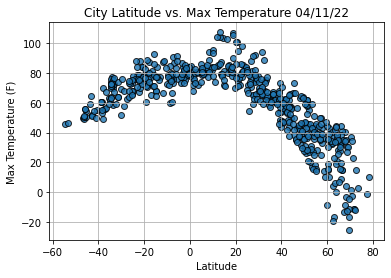

In [39]:
#import time
#import matplotlib.pyplot as plt
#build the scatter plot for latitude vs max. temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
#use the time module to insert the current date in the graph
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("weather_data/Fig1.png")
        
#Show the plot
plt.show()

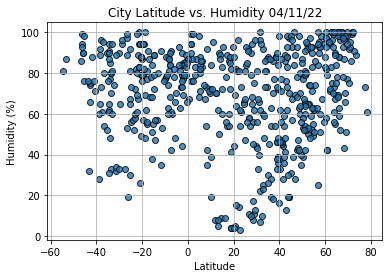

In [41]:
#create scatter plots for other variables
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
#use the time module to insert the current date in the graph
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("weather_data/Fig2.png")
        
#Show the plot
plt.show()

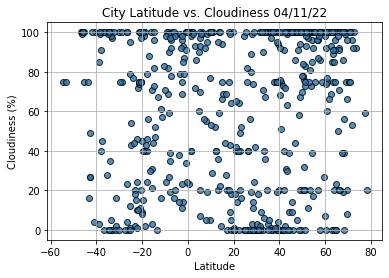

In [42]:
#create scatter plots for other variables
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
#use the time module to insert the current date in the graph
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("weather_data/Fig3.png")
        
#Show the plot
plt.show()

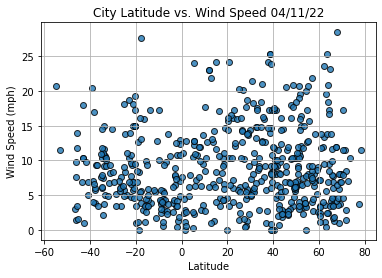

In [43]:
#create scatter plots for other variables
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
#use the time module to insert the current date in the graph
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("weather_data/Fig4.png")
        
#Show the plot
plt.show()

In [56]:
#create a function to perform linear regression on the weather data
#and plot a regression line and the equation within the data
# Import linregress
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calc the regression line "y values" from the slope and intercept
    regress_values = x_values*slope +intercept
    #get the eq of the line
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatterplot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line eq
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    ##need to call the function with the correct # of parameters/arguements for the function

In [57]:
#need to create a northern hemisphere df
index13 = city_data_df.loc[13]
index13

City           Bethel
Country            US
Lat           41.3712
Lng           -73.414
Max Temp        57.97
Humidity           44
Cloudiness          0
Wind Speed       4.61
Name: 13, dtype: object

In [58]:
#filter for northern hemi ( lat above 0)
#use loc to return a dataframe of all fitting the criteria rather than a list of all with true/false
#can chain .head() to see it, assign to variable
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

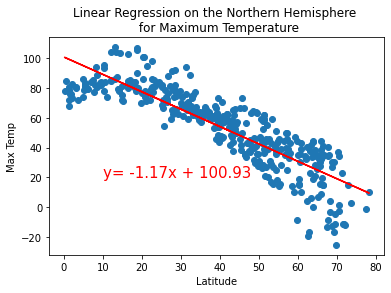

In [61]:
#to do linear regression have to have x & y values, so call those columns and set equal to variables
#linear regression on the northern hemi
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,20))

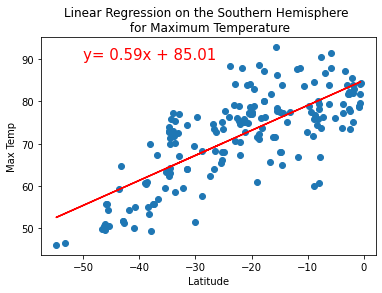

In [64]:
#make chart for southern hemi 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

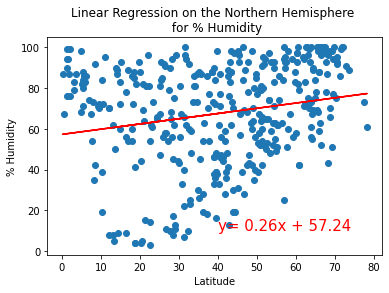

In [65]:
#make the chart for humidity in the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

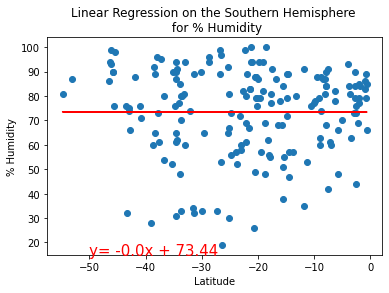

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

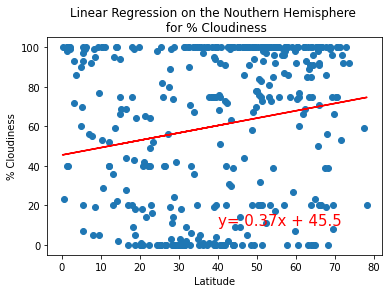

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

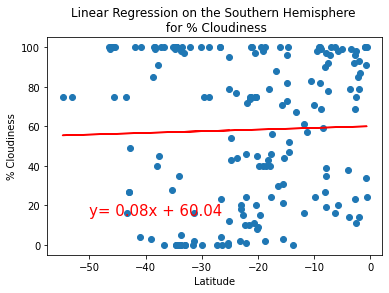

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

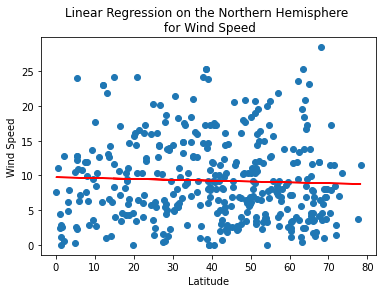

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

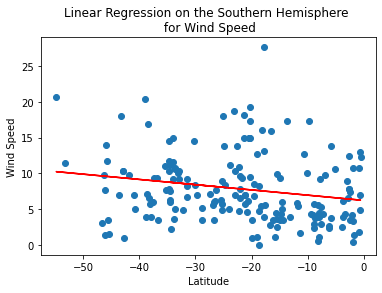

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))